# Load Data

In [1]:
import pandas as pd
import copy

In [2]:
token = pd.read_csv('data_l/ssodam2021_tokenized.csv')
token

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
0,1082901,익게2,해피뉴이어,2021년은 모두 행복한 한해가 되길,익명,2021/01/01,00:00,1343.0,195.0,0.0,"앗, 성지다, 첫글 ㅊㅊ, 추천 준다, 내 24살은 인생에서 가장 빛나는 날로 만들...",NaN,20.0,"[('2021년', 'Number'), ('은', 'Foreign'), ('모두',...","[('해피뉴이어', 'Noun')]","[('앗', 'Noun'), (',', 'Punctuation'), ('성지', '...",NaN
1,1082902,익게2,2021년 새해복 많이받으세요,모든 일이 잘 되기를 12시 땡,익명,2021/01/01,00:00,107.0,3.0,0.0,늦었네,"2빠다 ㅎㅎ, 내년에 도전한다",3.0,"[('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...","[('2021년', 'Number'), ('새해', 'Noun'), ('복', 'N...","[('늦었네', 'Verb')]","[('2', 'Number'), ('빠다', 'Noun'), ('ㅎㅎ', 'Kore..."
2,1082903,익게2,첫글은 내꼬,예비회계사 나다미,익명,2021/01/01,00:00,139.0,1.0,0.0,"ㄹㅇ 1등이네 ㅋㅋ, 실패",ㅜㅜ,3.0,"[('예비', 'Noun'), ('회계사', 'Noun'), ('나', 'Noun'...","[('첫', 'Modifier'), ('글', 'Noun'), ('은', 'Josa...","[('ㄹㅇ', 'KoreanParticle'), ('1등', 'Number'), (...","[('ㅜㅜ', 'KoreanParticle')]"
3,1082905,익게2,땡ㅎㅎㅎㅎㅎㅎㅎ,1등,익명,2021/01/01,00:00,39.0,0.0,0.0,NaN,NaN,0.0,"[('1등', 'Number')]","[('땡', 'Noun'), ('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')]",NaN,NaN
4,1082906,익게2,어디 카운트 다운 하는 곳 없냐,언제바껴,익명,2021/01/01,00:00,84.0,0.0,0.0,232번 불교방송,NaN,1.0,"[('언', 'Modifier'), ('제바', 'Noun'), ('껴', 'Ver...","[('어디', 'Noun'), ('카운트', 'Noun'), ('다운', 'Noun...","[('232', 'Number'), ('번', 'Noun'), ('불교', 'Nou...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77975,1200285,익게2,아버지께서 칼럼 쓰셨는데 댓글 한 번씩만 달아줄 수 있을까,2222408544049우리 아버지께서 이번에 짧은 칼럼처럼 블로그에 쓰시는 거 맡...,익명,2021/06/30,23:43,5802.0,374.0,11.0,"비댓으로 달래 너무 귀엽다, 이 글 조회수 늘리려면 제목 바꾸는거 추천 광고글인줄 ...","헉 피드백 반영했어 너무 고마워, 엇 아마 확인은 못하실 텐데 비댓이든 공개댓이든 ...",75.0,"[('2222408544049', 'Number'), ('우리', 'Noun'), ...","[('아버지', 'Noun'), ('께서', 'Josa'), ('칼럼', 'Noun...","[('비댓', 'Noun'), ('으로', 'Josa'), ('달래', 'Noun'...","[('헉', 'Adverb'), ('피드백', 'Noun'), ('반영', 'Nou..."
77976,1200287,익게2,프로포폴 하면 기분이 좋음,하는거 신기하네하면 힙해보여서 하는건가,익명,2021/06/30,23:47,373.0,1.0,1.0,썰로 들은 거라 정확하지는 않는데 지방흡입할 때 고통 줄이려고 프로포폴 투약하다가 ...,NaN,5.0,"[('하는거', 'Verb'), ('신기하네하면', 'Adjective'), ('힙...","[('프로포폴', 'Noun'), ('하면', 'Verb'), ('기분', 'Nou...","[('썰로', 'Verb'), ('들은', 'Verb'), ('거', 'Noun')...",NaN
77977,1200288,익게2,취업 후기 쓰려는데 안올라간다ㅠ,손다쳐서 폰으로 열심히 적었는데나한테왜 이래ㅠ혹시 뭔가 지켜야 하는 양식이 있나요ㅠ...,익명,2021/06/30,23:49,387.0,3.0,0.0,"중간에 임티 넣었었어, 임티, 1 이모티콘 빼기2 사진 많으면 업로드 될 동안 조금...",이건 되네,7.0,"[('손', 'Noun'), ('다쳐서', 'Verb'), ('폰', 'Noun')...","[('취업', 'Noun'), ('후기', 'Noun'), ('쓰려는데', 'Ver...","[('중간', 'Noun'), ('에', 'Josa'), ('임티', 'Noun')...","[('이건', 'Noun'), ('되네', 'Verb')]"
77978,1200291,익게2,간떨어지는동거 보는 사람,아 이번주 기대했는데 예고편...,익명,2021/06/30,23:55,138.0,6.0,0.0,"너무 오글거리는데 장기용때매 봄 ㅎㅎ, 난 계선우땜에 봐ㅠㅠ, 나도 계선우 때문에 ...",NaN,3.0,"[('아', 'Exclamation'), ('이번', 'Noun'), ('주', '...","[('간', 'Noun'), ('떨어지는', 'Verb'), ('동거', 'Noun...","[('너무', 'Adverb'), ('오글거리는데', 'Verb'), ('장기', ...",NaN


## 토큰 object load

pickle 파일에 담겨있는 list 파일 불러오기

In [22]:
import pickle
with open('data_l/all_tokenized_list.pkl', 'rb') as f:
    all_tokenized = pickle.load(f)
    
all_tokenized[2:4]

[["('예비', 'Noun')",
  "('회계사', 'Noun')",
  "('나', 'Noun')",
  "('다미', 'Noun')",
  "('첫', 'Modifier')",
  "('글', 'Noun')",
  "('은', 'Josa')",
  "('내꼬', 'Noun')",
  "('ㄹㅇ', 'KoreanParticle')",
  "('1등', 'Number')",
  "('이네', 'Foreign')",
  "('ㅋㅋ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('실패', 'Noun')",
  "('ㅜㅜ', 'KoreanParticle')"],
 ["('1등', 'Number')", "('땡', 'Noun')", "('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')"]]

Noun만 추리기

In [23]:
noun_tokenized = []

for i in range(len(all_tokenized)):
    noun_list = []
    for j in range(len(all_tokenized[i])):
        if 'Noun' in all_tokenized[i][j]:
            noun_list.append(all_tokenized[i][j])
    noun_tokenized.append(noun_list)

noun_tokenized[2:4]

[["('예비', 'Noun')",
  "('회계사', 'Noun')",
  "('나', 'Noun')",
  "('다미', 'Noun')",
  "('글', 'Noun')",
  "('내꼬', 'Noun')",
  "('실패', 'Noun')"],
 ["('땡', 'Noun')"]]

## 키워드별, 일별 빈출 10위 내 등재 횟수

__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(10위)에 등재되었는지__ 담은 리스트 불러오기

In [27]:
import pickle

with open("data/2nd_10bow.pkl","rb") as fr:
    bow_10 = pickle.load(fr)
#내림차순 정렬
bow_10 = bow_10.sort_values('count', ascending = False)
bow_10.head()

,keyword,count
114,연애,8
420,외모,8
17,변호사,8
69,문과,8
577,아빠,7


__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(20위)에 등재되었는지__ 담은 리스트 불러오기

In [28]:
import pickle

with open("data/2nd_20bow.pkl","rb") as fr:
    bow_20 = pickle.load(fr)
    
#내림차순 정렬
bow_20 = bow_20.sort_values('count', ascending = False)
bow_20.head()

,keyword,count
35,변호사,14
178,결혼,13
137,문과,12
40,휴학,12
271,아빠,12


# 떡밥 묶음 찾기

### bow 생성

__bow_10과 bow_20의 인덱스 비교__

비교 결과 bow_20가 bow_10를 포함한다

In [31]:
a = list(bow_10['keyword'])
a[:5]

['연애', '외모', '변호사', '문과', '아빠']

In [32]:
b = list(bow_20['keyword'])
b[:5]

['변호사', '결혼', '문과', '휴학', '아빠']

In [24]:
for i in range(len(a)):
    if a[i] not in b:
        print('bow_10의 keyword는 bow_20의 keyword에 다 포함되지 않는다.')
        break
print('끝') ## bow_10의 keyword는 bow_20의 keyword에 다 포함된다.

끝


__bow__
pd.merge를 활용한 JOIN 실행 -> bow_10과 bow_20의 count합 도출

In [11]:
bow = bow_20.copy()
bow['count'] = bow['count']*0.5

bow = bow.merge(bow_10, left_on='keyword', right_on='keyword',
          suffixes=('', '_10'))
bow['count'] = bow['count'] + bow['count_10']
bow.drop('count_10',axis=1,inplace=True)
bow = bow.sort_values('count',ascending=False)

In [12]:
bow_keyword = list(bow['keyword'])
bow_keyword

['변호사',
 '문과',
 '외모',
 '연애',
 '아빠',
 '동생',
 '일본',
 '휴학',
 '의사',
 '중국',
 '고양이',
 '논문',
 '세대',
 '동아리',
 '학부',
 '결혼',
 '조교',
 '대면',
 '수능',
 '대출',
 '헌혈',
 '언니',
 '수술',
 '의대',
 '이과',
 '경제학',
 '애플',
 '총장',
 '냉동',
 '투표',
 '경찰',
 '오빠',
 '할머니',
 '과외',
 '공대',
 '생일',
 '족보',
 '리트',
 '삼성',
 '검사',
 '팬',
 '자랑',
 '서울대',
 '로욜라',
 '미국',
 '백신',
 '합격',
 '교회',
 '곡',
 '부동산',
 '정치',
 '폰',
 '방송',
 '병원',
 '철학',
 '복전',
 '학벌',
 '커뮤',
 '아파트',
 '마스크',
 '정원',
 '피해자',
 '선수',
 '소득',
 '축하',
 '카페',
 '담배',
 '진이뽀',
 '예수회',
 '부모님',
 '학생회',
 '코인',
 '경영',
 '장학금',
 '상담',
 '피자',
 '입결',
 '시장',
 '커서',
 '계절',
 '씨',
 '키',
 '학회',
 '공감',
 '자리',
 '강아지',
 '주식',
 '전기',
 '세금',
 '가슴',
 '선물',
 '학번',
 '능력',
 '가격',
 '휴가',
 '전화',
 '경제',
 '대학원',
 '인간',
 '아버지',
 '피부',
 '누나',
 '영상',
 '비대',
 '알바',
 '게임',
 '필기',
 '수강신청',
 '메일',
 '선배',
 '보험',
 '진자',
 '형',
 '자살',
 '여자친구',
 '졸업',
 '인턴',
 '발',
 '범죄',
 '생리',
 '경영학',
 '정신',
 '술',
 '국어',
 '언어',
 '카드',
 '군인',
 '가족',
 '선임',
 '표현',
 '사장',
 '학원',
 '책',
 '커피',
 '신고',
 '로스쿨',
 '금시',
 '유통',
 '토트넘',
 '화장실',
 '

In [13]:
bow_keyword_noun = []
for i in range(len(bow_keyword)):
    bow_keyword_noun.append("('" + bow_keyword[i] +"', 'Noun')")
    
bow_keyword_noun

["('변호사', 'Noun')",
 "('문과', 'Noun')",
 "('외모', 'Noun')",
 "('연애', 'Noun')",
 "('아빠', 'Noun')",
 "('동생', 'Noun')",
 "('일본', 'Noun')",
 "('휴학', 'Noun')",
 "('의사', 'Noun')",
 "('중국', 'Noun')",
 "('고양이', 'Noun')",
 "('논문', 'Noun')",
 "('세대', 'Noun')",
 "('동아리', 'Noun')",
 "('학부', 'Noun')",
 "('결혼', 'Noun')",
 "('조교', 'Noun')",
 "('대면', 'Noun')",
 "('수능', 'Noun')",
 "('대출', 'Noun')",
 "('헌혈', 'Noun')",
 "('언니', 'Noun')",
 "('수술', 'Noun')",
 "('의대', 'Noun')",
 "('이과', 'Noun')",
 "('경제학', 'Noun')",
 "('애플', 'Noun')",
 "('총장', 'Noun')",
 "('냉동', 'Noun')",
 "('투표', 'Noun')",
 "('경찰', 'Noun')",
 "('오빠', 'Noun')",
 "('할머니', 'Noun')",
 "('과외', 'Noun')",
 "('공대', 'Noun')",
 "('생일', 'Noun')",
 "('족보', 'Noun')",
 "('리트', 'Noun')",
 "('삼성', 'Noun')",
 "('검사', 'Noun')",
 "('팬', 'Noun')",
 "('자랑', 'Noun')",
 "('서울대', 'Noun')",
 "('로욜라', 'Noun')",
 "('미국', 'Noun')",
 "('백신', 'Noun')",
 "('합격', 'Noun')",
 "('교회', 'Noun')",
 "('곡', 'Noun')",
 "('부동산', 'Noun')",
 "('정치', 'Noun')",
 "('폰', 'Noun')",
 "('방송'

### Word2Vec

In [14]:
from gensim.models import Word2Vec
model_a = Word2Vec(sentences = all_tokenized, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).
'''

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).\n'

In [15]:
word_vectors = model_a.wv
vocabs = bow_keyword_noun[:100]
word_vectors_list = [word_vectors[v] for v in vocabs]
word_vectors_list

[array([ 0.6028542 ,  0.14755712, -0.03169455, -0.07014462, -0.04223834,
        -0.43028396,  0.14410923,  0.5255664 , -0.28527236, -0.14500023,
         0.03672441, -0.5808297 , -0.20202844,  0.36192617, -0.05212273,
         0.08358631,  0.09912005, -0.27716017,  0.06232378,  0.02279321,
         0.33733326,  0.512683  ,  0.0428022 ,  0.3225374 ,  0.35097945,
         0.0546934 , -0.35832247, -0.3450515 , -0.03518893, -0.26063958,
         0.36273685,  0.16239224,  0.6449985 ,  0.22840965, -0.28755108,
        -0.01758731,  0.37153858, -0.3740647 , -0.31108654,  0.01000091,
        -0.09313194,  0.356283  , -0.47263148, -0.19113672, -0.2722946 ,
        -0.07710599,  0.26576224, -0.37527663, -0.24928288,  0.21271488,
         0.1698971 , -0.5351872 ,  0.12242421, -0.83635   , -0.0960082 ,
         0.40433076,  0.28680938,  0.41004384, -0.19218847,  0.43251887,
         0.05987173, -0.2562111 , -0.07709087, -0.17429657,  0.05793322,
        -0.04071753, -0.08452209,  0.07995439, -0.7

In [16]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))


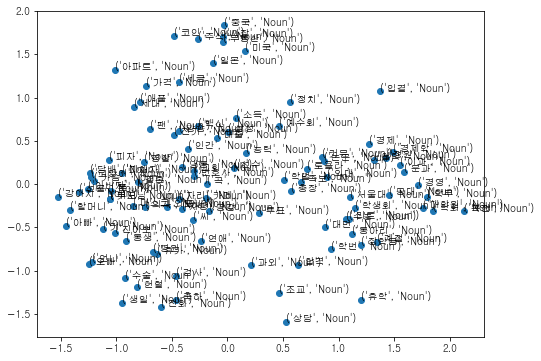

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

plt.rcParams['font.family'] = 'Gulim'
 
# 결과2
plot_2d_graph(vocabs, xs, ys)
plt.show()
## 처음부터 100개

---

#### 다린 방법

In [43]:
similarity_75_list = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_n.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list.append(sim_keyword_list)
    
similarity_75_list
# Noun으로 모델 

NameError: name 'model_n' is not defined

In [44]:
similarity_75_list_a = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list_a.append(sim_keyword_list)
    
similarity_75_list_a
# all_tokenized으로 모델

[['변호사', '회계사', '약사'],
 ['문과', '이과', '공대', '서울대', '정시', '약대'],
 ['외모', '몸매'],
 ['아빠', '언니', '할머니', '아버지', '누나', '어머니', '할아버지', '이모'],
 ['일본', '중국', '미국', '한국', '우리나라'],
 ['휴학', '복학'],
 ['중국', '미국', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['학부', '대학원', '인문'],
 ['동아리', '학회', '친목'],
 ['수능', '국어'],
 ['대면', '비대', '전면'],
 ['애플', '갤럭시'],
 ['경제학', '경제', '경영학', '미시'],
 ['대출', '청약'],
 ['의대', '서울대', '로스쿨', '성대', '중앙대', '연대', '약대'],
 ['헌혈', '혈소판'],
 ['언니', '오빠', '누나'],
 ['이과', '서울대', '외고'],
 ['총장', '이사회'],
 ['오빠', '누나'],
 ['경찰', '수사', '검찰', '영장'],
 ['삼성', '엘지'],
 ['리트', '피셋'],
 ['공대', '컴공'],
 ['할머니', '부모님', '아버지', '어머니', '할아버지', '삼촌'],
 ['곡', '앨범', '노래'],
 ['폰', '아이폰', '노트북', '휴대폰'],
 ['백신', '접종'],
 ['병원', '대학병원', '치과'],
 ['미국', '한국'],
 ['복전', '컴공', '재수강'],
 ['로욜라', '도서관', '열람'],
 ['서울대',
  '로스쿨',
  '성대',
  '중앙대',
  '성균관대',
  '고려대',
  '연대',
  '약대',
  '외고',
  '한양',
  '충북대',
  '스탠포드',
  '연고'],
 ['피해자', '가해자', '김정현'],
 ['아파트', '건물'],
 ['계절', '수강신청', '교양', '재수강'],
 ['학생회', '선거'],
 ['입결', '취업률'],
 ['경영', '경제'

In [254]:
print(model_a.wv.similarity(w1="('변호사', 'Noun')", w2="('약사', 'Noun')"))

0.8163171


In [100]:
for i in range(len(similarity_75_list)):
    if '약사' in similarity_75_list[i]:
        print(i)

0
100


In [127]:
similarity_75_list_a[0]

['변호사', '약사', '회계사']

In [128]:
similarity_75_list_a[8][0] in similarity_75_list_a[7]

True

In [256]:
similarity_75_list_a1 = copy.deepcopy(similarity_75_list_a)
new_list = []
in_list = []

for i in reversed(range(len(similarity_75_list_a1))):
    for k in range(i):
        if similarity_75_list_a1[i][0] in similarity_75_list_a1[k]:
            similarity_75_list_a1[k] = similarity_75_list_a1[k] + similarity_75_list_a1[i]
            print(i, '&', similarity_75_list_a1[i][0], '&', k)
            
            
            new_list.append(k) # 새로 합쳐지는 메인 리스트 번호
            in_list.append(i) # 들어가지는 리스트 번호
            

388 & 현아 & 341
388 & 현아 & 343
388 & 현아 & 383
387 & 불완전 & 276
387 & 불완전 & 292
387 & 불완전 & 314
387 & 불완전 & 315
387 & 불완전 & 319
387 & 불완전 & 386
386 & 곤충 & 297
386 & 곤충 & 319
385 & 자료구조 & 317
385 & 자료구조 & 382
384 & 로그인 & 337
383 & 리바이 & 219
383 & 리바이 & 248
383 & 리바이 & 368
381 & 게놈 & 319
380 & 스웨덴 & 229
380 & 스웨덴 & 331
380 & 스웨덴 & 350
379 & 샌드위치 & 152
379 & 샌드위치 & 240
379 & 샌드위치 & 246
379 & 샌드위치 & 329
379 & 샌드위치 & 347
379 & 샌드위치 & 366
377 & 교화 & 232
377 & 교화 & 236
377 & 교화 & 253
377 & 교화 & 256
377 & 교화 & 268
377 & 교화 & 274
377 & 교화 & 361
377 & 교화 & 367
376 & 옐피 & 347
376 & 옐피 & 359
375 & 명연 & 278
375 & 명연 & 300
375 & 명연 & 301
375 & 명연 & 353
374 & 복수 & 28
373 & 여드름 & 52
373 & 여드름 & 330
372 & 과고 & 1
372 & 과고 & 16
372 & 과고 & 27
372 & 과고 & 31
372 & 과고 & 289
372 & 과고 & 294
372 & 과고 & 362
371 & 허벅지 & 139
371 & 허벅지 & 196
371 & 허벅지 & 328
371 & 허벅지 & 358
370 & 시립대 & 31
370 & 시립대 & 98
370 & 시립대 & 132
370 & 시립대 & 301
370 & 시립대 & 313
370 & 시립대 & 353
369 & 조선족 & 78
369 & 조선족 & 216
368 & 코다리 & 248
368 & 

In [257]:
similarity_75_list_a1

[['변호사',
  '약사',
  '회계사',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업',
  '약사',
  '회계사',
  '전문직',
  '전문직',
  '개업',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업'],
 ['문과',
  '이과',
  '공대',
  '서울대',
  '정시',
  '약대',
  '과고',
  '과고',
  '신학',
  '약대',
  '한의대',
  '서울대',
  '로스쿨',
  '성대',
  '중대',
  '중앙대',
  '연고',
  '스탠포드',
  '한양',
  '포스텍',
  '충북대',
  '외고',
  '성균관대',
  '고려대',
  '약대',
  '연대',
  '충남대',
  '카이스트',
  '시립대',
  '과고',
  '신학',
  '한양대',
  '한의대',
  '과고',
  '신학',
  '시립대',
  '한양대',
  '카이스트',
  '과고',
  '신학',
  '한양대',
  '과고',
  '신학',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '약대',
  '한의대',
  '고려대',
  '연대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',


In [258]:
new_list = list(set(new_list))
in_list = list(set(in_list))

In [259]:
in_list

[8,
 16,
 20,
 24,
 26,
 27,
 31,
 37,
 43,
 47,
 50,
 53,
 63,
 69,
 77,
 86,
 88,
 89,
 91,
 94,
 95,
 96,
 98,
 100,
 106,
 107,
 108,
 112,
 114,
 116,
 123,
 129,
 130,
 132,
 133,
 136,
 144,
 148,
 154,
 156,
 161,
 163,
 164,
 165,
 168,
 170,
 172,
 173,
 179,
 182,
 183,
 185,
 186,
 187,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 201,
 202,
 208,
 209,
 210,
 220,
 221,
 222,
 223,
 224,
 225,
 228,
 230,
 235,
 238,
 246,
 250,
 252,
 255,
 256,
 258,
 260,
 262,
 264,
 265,
 266,
 268,
 269,
 272,
 273,
 274,
 275,
 278,
 281,
 282,
 284,
 286,
 287,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 300,
 301,
 303,
 304,
 305,
 307,
 312,
 313,
 321,
 324,
 326,
 328,
 329,
 331,
 336,
 338,
 341,
 343,
 344,
 346,
 347,
 348,
 350,
 351,
 352,
 353,
 357,
 359,
 360,
 361,
 362,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 387,
 388]

In [260]:
for i in new_list:
    similarity_75_list_a1[i] = list(set(similarity_75_list_a1[i]))

similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [261]:
similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [262]:
similarity_75_list_a2 = copy.deepcopy(similarity_75_list_a1)
for i in range(len(similarity_75_list_a2)):
    if i in in_list:
        similarity_75_list_a2[i] = []
        
for i in range(len(in_list)):
    similarity_75_list_a2.remove([])
    
similarity_75_list_a2 ## 관련 단어 가지 하나 쳐서 다 포함시킨 리스트들의 리스트

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이

In [265]:
similarity_75_list_a3 = copy.deepcopy(similarity_75_list_a2)

for i in range(len(similarity_75_list_a3)):
    
    for j in range(len(similarity_75_list_a3[i])):
        sim_count = 0
        exclude_count = 1
    
        for k in range(len(similarity_75_list_a3[i])):
            if similarity_75_list_a3[i][k] == '':
                pass
            else:
                if model_a.wv.similarity(w1="('" + similarity_75_list_a3[i][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a3[i][k] +"', 'Noun')") <= 0.6:
                    sim_count += 1
    
        if sim_count/(len(similarity_75_list_a3[i])-exclude_count) >= 1/4:
            similarity_75_list_a3[i][j] = ''
            exclude_count += 1
        
        

    similarity_75_list_a3[i] = [word for word in similarity_75_list_a3[i] if word != '']

    
similarity_75_list_a3

[['약사', '회계사', '전문직', '개업', '변호사'],
 ['고려대',
  '약대',
  '공대',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '문과',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['유럽', '중국', '미국', '외국', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['고려대',
  '공대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수학', '영어', '수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['아이패드', '호환성', '맥북', '에어', '갤탭', '애플', '워치', '갤럭시', '버즈', '그램'],
 ['외고',
  '고려대',
  '약대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '의대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '서울대',
  '한의대',
  '과고',
  '충남대',
  '스탠포드',
  '카이스

In [275]:
similarity_75_list_a3[1]

['고려대',
 '약대',
 '공대',
 '중앙대',
 '신학',
 '연대',
 '한양',
 '성대',
 '연고',
 '시립대',
 '이과',
 '충북대',
 '중대',
 '차석',
 '한양대',
 '문과',
 '서울대',
 '과고',
 '한의대',
 '충남대',
 '스탠포드',
 '카이스트']

In [289]:
def compare(list1, list2):
    count = 0
    
    for i in range(len(list1)):
        for j in range(len(list2)):
            if list1[i] == list2[j]:
                count += 1
            
    if count/max(len(list1), len(list2)) >= 1/3:
        list1 = list(set(list1 + list2))
        return list1

In [290]:
similarity_75_list_a4 = copy.deepcopy(similarity_75_list_a3)
similarity_75_list_a5 = []
count = 0

for i in range(len(similarity_75_list_a4)):
    for j in range(len(similarity_75_list_a4)):
        if j == i:
            pass
        else:
            similarity_75_list_a5.append(compare(similarity_75_list_a4[i],
                                                 similarity_75_list_a4[j]))
                

            
similarity_75_list_a5

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['변리사', '고시', '약사', '회계사', '전문직', '행시', '개업', '변호사'],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['약사', '회계사', '전문직', '개업', '변호사', '공무원'],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['직업', '약사', '회계사', '전문직', '개업', '변호사'],
 None,
 None,
 None,
 None,
 None,
 None,

In [220]:
for j in range(len(similarity_75_list_a2[1])):
    for k in range(j+1, len(similarity_75_list_a2[1])):
        if model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')") <= 0.5:

            print(j, k, model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')"))
                # 오 이런 삭제 방법 애매하다...

0 15 0.36559466
0 24 0.4256015
1 10 0.49455172
1 15 0.47174078
1 24 0.47080758
1 31 0.4609941
2 15 0.43818685
2 31 0.45381093
4 5 0.4057051
4 8 0.41990295
4 12 0.49794504
4 15 0.371086
4 17 0.46301496
4 19 0.4714507
4 20 0.4939649
4 21 0.46586108
4 22 0.47932437
4 23 0.4855856
4 24 0.4025789
4 26 0.3635216
4 28 0.4514345
4 31 0.46548057
4 35 0.37558722
4 36 0.44556245
4 37 0.46082893
5 31 0.4904248
6 15 0.4287898
6 24 0.48534197
6 31 0.4744114
7 15 0.46180663
8 10 0.47626746
8 31 0.4763695
9 10 0.497396
9 31 0.46965954
10 15 0.41604608
10 16 0.4959768
10 17 0.45554438
10 20 0.4638661
10 21 0.44208238
10 24 0.48703688
10 26 0.4085726
10 34 0.4698346
10 36 0.48408186
10 37 0.44558215
11 15 0.4432119
11 24 0.4850443
11 26 0.43317312
11 35 0.47182417
13 15 0.40273523
13 17 0.46125147
13 19 0.4986462
13 24 0.49184665
13 26 0.4388079
13 34 0.47783342
13 35 0.40790844
13 36 0.4324451
13 37 0.49474028
15 17 0.43069398
15 19 0.46702066
15 20 0.40521288
15 22 0.46447557
15 25 0.49449885
15 29 0.

#### 정균 방법

In [200]:
similarity_75_list_b = []

for i in range(len(bow_keyword)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')")
        if sim >= 0.75:
            df = df.append(pd.DataFrame([[bow_keyword[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_b.append(list(df['word']))
    
similarity_75_list_b
# all_tokenized으로 모델
# similarity 큰 순으로 정렬

[['변호사', '약사', '회계사'],
 ['문과', '이과', '공대', '과고', '정시', '서울대', '약대'],
 ['외모', '몸매', '학벌'],
 ['연애', '짝사랑'],
 ['아빠', '엄마', '엄니', '할머니', '어머니', '아버지', '할아버지'],
 ['휴학', '복학'],
 ['동생', '언니', '엄마'],
 ['일본', '중국', '한국', '우리나라', '미국', '유럽'],
 ['중국', '미국', '우리나라', '한국', '대만', '유럽'],
 ['고양이', '강아지'],
 ['학부', '대학원', '인문', '공대'],
 ['동아리', '학회', '활동', '연합'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['이과', '서울대', '한양대', '공대', '문이과', '성대', '과고'],
 ['애플', '워치', '갤럭시', '버즈'],
 ['의대', '서울대', '한의대', '약대', '중앙대', '성대', '로스쿨', '카이스트', '연대'],
 ['헌혈', '혈소판', '백혈구'],
 ['언니', '오빠', '누나'],
 ['대출', '전세'],
 ['총장', '이사회'],
 ['경찰', '검찰', '영장'],
 ['오빠', '누나'],
 ['삼성', '엘지'],
 ['할머니', '할아버지', '엄마', '어머니', '엄니', '아버지', '삼촌', '부모님'],
 ['공대', '과고', '컴공', '인문', '서울대', '대학원'],
 ['복전', '컴공', '전공', '복수', '재수강'],
 ['병원', '대학병원', '치과'],
 ['곡', '앨범', '노래'],
 ['서울대',
  '연대',
  '중앙대',
  '성대',
  '한양대',
  '카이스트',
  '시립대',
  '고려대',
  '약대',
  '충남대',
  '신학',
  '과고',
  '한의대',
  '외고',
  '중대',
  '로스쿨',
 

---
##### 예시로 연습

In [115]:
df1 = pd.DataFrame({'word':[['변호사', '약사', '회계사'], ['약사', '변리사', '전문직'], ['회계사', '변리사', '전문직']],
                    'index': [[None, 1, 2], [None, None, None], [None, None, None]]})
df1 
# 해당 단어가 첫번째로 있는 word의 행이 어딘지 알려주는 list 필요

,word,index
0,"[변호사, 약사, 회계사]","[None, 1, 2]"
1,"[약사, 변리사, 전문직]","[None, None, None]"
2,"[회계사, 변리사, 전문직]","[None, None, None]"


In [116]:
for i in range(len(df1)):
    for j in range(1,len(df1['index'].loc[i])):
        new_idx = df1['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df1['word'].loc[i][j])
            df1['word'].loc[i][j] = L
        else:
            df1['word'].loc[i][j] = copy.deepcopy(df1['word'].loc[new_idx])
            
df1 #1단계 가지치기

,word,index
0,"[변호사, [약사, 변리사, 전문직], [회계사, 변리사, 전문직]]","[None, 1, 2]"
1,"[약사, [변리사], [전문직]]","[None, None, None]"
2,"[회계사, [변리사], [전문직]]","[None, None, None]"


In [117]:
df1['index'].loc[1][0] == None

True

In [118]:
for i in range(0,len(df1['word'].loc[0])):
    if df1['index'].loc[0][i] == None:
        pass
    else:
        for j in range(1, len(df1['word'].loc[0][i])):
            if df1['word'].loc[0][i][j] == 'bye':
                pass
            else:
                for k in range(i+1, len(df1['word'].loc[0])):
                    for l in range(len(df1['word'].loc[0][k])):
                        if df1['word'].loc[0][k][l] == 'bye':
                            pass
                        else:
                            sim = model_a.wv.similarity(w1="('" + df1['word'].loc[0][i][j] +"', 'Noun')", w2="('" + df1['word'].loc[0][k][l] +"', 'Noun')")
                            print(i, j, sim, k, l)
                            if sim <= 0.7:
                                df1['word'].loc[0][k][l] = 'bye'
                                
df1
# 1단계 가지 포함해서 유사도 일정 값보다 낮으면 제거하는 걸로 (유사도 낮은 가지에서 먼저 제거)

1 1 0.7785429 2 0
1 1 1.0 2 1
1 1 0.6503012 2 2
1 2 0.78217876 2 0
1 2 0.6503012 2 1


,word,index
0,"[변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]","[None, 1, 2]"
1,"[약사, [변리사], [전문직]]","[None, None, None]"
2,"[회계사, [변리사], [전문직]]","[None, None, None]"


In [119]:
for i in range(0,len(df1['word'].loc[1])):
    if df1['index'].loc[0][i] == None:
        pass
    else:
        for j in range(1, len(df1['word'].loc[1][i])):
            if df1['word'].loc[1][i][j] == 'bye':
                pass
            else:
                for k in range(i+1, len(df1['word'].loc[1])):
                    for l in range(len(df1['word'].loc[1][k])):
                        if df1['word'].loc[1][k][l] == 'bye':
                            pass
                        else:
                            sim = model_a.wv.similarity(w1="('" + df1['word'].loc[1][i][j] +"', 'Noun')",
                                                        w2="('" + df1['word'].loc[1][k][l] +"', 'Noun')")
                            print(i, j, sim, k, l)
                            if sim <= 0.7:
                                df1['word'].loc[1][k][l] = 'bye'
                                
df1

,word,index
0,"[변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]","[None, 1, 2]"
1,"[약사, [변리사], [전문직]]","[None, None, None]"
2,"[회계사, [변리사], [전문직]]","[None, None, None]"


In [398]:
df1['word'].loc[1][1]

'변리사'

In [120]:
df1

,word,index
0,"[변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]","[None, 1, 2]"
1,"[약사, [변리사], [전문직]]","[None, None, None]"
2,"[회계사, [변리사], [전문직]]","[None, None, None]"


In [121]:
for h in range(len(df1)):

    list_test = []

    for i in range(len(df1['word'].loc[h])):
        if i != 0:
            if type(df1['word'].loc[h][i]) is not list:
                list_test.append(df1['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df1['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df1['word'].loc[h][0])
        
    list_test

    df1['word'].loc[h] = list_test

df1

,word,index
0,"[변호사, 회계사, 약사, 변리사, 전문직]","[None, 1, 2]"
1,"[약사, 변리사, 전문직]","[None, None, None]"
2,"[회계사, 변리사, 전문직]","[None, None, None]"


---
##### 실전

In [96]:
list_idx = []

for i in range(len(similarity_75_list_b)):
    
    list_idx_in = []
    for j in range(len(similarity_75_list_b[i])):
        list_idx_in.append(None)
    
    for j in range(1, len(similarity_75_list_b[i])):
        for k in range(i+1, len(similarity_75_list_b)):
            if similarity_75_list_b[i][j] == similarity_75_list_b[k][0]:
                list_idx_in[j] = k
    
    
    list_idx.append(list_idx_in)
    
list_idx

[[None, 92, None],
 [None, 16, 23, None, 26, None],
 [None, None],
 [None, None, 22, 47, 90, 14, None],
 [None, 6, 116, 28, None],
 [None, None],
 [None, None, 28, 116],
 [None, None],
 [None, None, None],
 [None, 45, None],
 [None, 49],
 [None, 58],
 [None, None],
 [None, None],
 [None, 21, None],
 [None, 26, None, 16, 62, None, 95],
 [None, 23, 26, None],
 [None, None, None],
 [None, 142, 107],
 [None, None],
 [None, 87, 65],
 [None, None],
 [None, None, 90, 47],
 [None, 123, 34],
 [None, None],
 [None, None],
 [None, None, 95, 85, 190, None, 154, 62, 89, None, None],
 [None, 77, None],
 [None, 116, None],
 [None, None],
 [None, 86, 138],
 [None, None, 76],
 [None, 162, None],
 [None, 144],
 [None, 123, 140],
 [None, 81, 184, 167],
 [None, None],
 [None, None],
 [None, 43],
 [None, None, None],
 [None, 166, None],
 [None, None],
 [None, 140, None],
 [None, None, None],
 [None, None],
 [None, None, 62],
 [None, None],
 [None, 90, None],
 [None, 79],
 [None, None],
 [None, None],
 [Non

In [108]:
similarity_75_list_b1 = copy.deepcopy(similarity_75_list_b)

df_sim_75 = pd.DataFrame({'word': similarity_75_list_b1,
                    'index': list_idx})
df_sim_75 

,word,index
0,"[변호사, 회계사, 약사]","[None, 92, None]"
1,"[문과, 이과, 공대, 약대, 서울대, 외고]","[None, 16, 23, None, 26, None]"
2,"[외모, 몸매]","[None, None]"
3,"[아빠, 할아버지, 할머니, 아버지, 어머니, 언니, 누나]","[None, None, 22, 47, 90, 14, None]"
4,"[일본, 중국, 한국, 미국, 우리나라]","[None, 6, 116, 28, None]"
...,...,...
200,"[상평, 절평]","[None, None]"
201,"[가투소, 폰세카]","[None, None]"
202,"[기권, 재심]","[None, None]"
203,"[존잘, 존예]","[None, None]"


In [109]:
for i in range(len(df_sim_75)):
    for j in range(1,len(df_sim_75['index'].loc[i])):
        new_idx = df_sim_75['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df_sim_75['word'].loc[i][j])
            df_sim_75['word'].loc[i][j] = L
        else:
            df_sim_75['word'].loc[i][j] = copy.deepcopy(df_sim_75['word'].loc[new_idx])
            
df_sim_75 #1단계 가지치기

,word,index
0,"[변호사, [회계사, 전문직, 변리사], [약사]]","[None, 92, None]"
1,"[문과, [이과, 공대, 서울대, 약대], [공대, 컴공, 복전], [약대], [서...","[None, 16, 23, None, 26, None]"
2,"[외모, [몸매]]","[None, None]"
3,"[아빠, [할아버지], [할머니, 할아버지, 어머니, 아버지], [아버지, 어머니,...","[None, None, 22, 47, 90, 14, None]"
4,"[일본, [중국, 우리나라, 미국, 한국], [한국, 우리나라], [미국, 한국, ...","[None, 6, 116, 28, None]"
...,...,...
200,"[상평, [절평]]","[None, None]"
201,"[가투소, [폰세카]]","[None, None]"
202,"[기권, [재심]]","[None, None]"
203,"[존잘, [존예]]","[None, None]"


In [110]:
for h in range(len(df_sim_75)):
    for i in range(0,len(df_sim_75['word'].loc[h])):
        if df_sim_75['index'].loc[h][i] == None:
            print('pass :', h,i)
            pass
        else:
            print('in list :', h,i)
            for j in range(1, len(df_sim_75['word'].loc[h][i])):
                if df_sim_75['word'].loc[h][i][j] == 'bye':
                    pass
                else:
                    for k in range(i+1, len(df_sim_75['word'].loc[h])):
                        for l in range(len(df_sim_75['word'].loc[h][k])):
                            if df_sim_75['word'].loc[h][k][l] == 'bye':
                                pass
                            else:
                                sim = model_a.wv.similarity(w1="('" + df_sim_75['word'].loc[h][i][j] +"', 'Noun')",
                                                            w2="('" + df_sim_75['word'].loc[h][k][l] +"', 'Noun')")
                                
                                print(h, i, j, sim, k, l)
                                   
                                if sim <= 0.5:
                                    print(df_sim_75['word'].loc[h][k])
                                    df_sim_75['word'].loc[h][k][l] = 'bye'
                                
df_sim_75
# 1단계 가지 포함해서 유사도 일정 값보다 낮으면 제거하는 걸로 (유사도 낮은 가지에서 먼저 제거)

pass : 0 0
in list : 0 1
0 1 1 0.7428833 2 0
0 1 2 0.5624568 2 0
pass : 0 2
pass : 1 0
in list : 1 1
1 1 1 1.0 2 0
1 1 1 0.79292685 2 1
1 1 1 0.7507276 2 2
1 1 1 0.713783 3 0
1 1 1 0.740502 4 0
1 1 1 0.7260894 4 1
1 1 1 0.6715623 4 2
1 1 1 0.72276473 4 3
1 1 1 0.63394517 4 4
1 1 1 0.713783 4 5
1 1 1 0.70992535 4 6
1 1 1 0.6930798 4 7
1 1 1 0.68122923 4 8
1 1 1 0.6615578 4 9
1 1 1 0.6733069 4 10
1 1 1 0.6392082 5 0
1 1 2 0.740502 2 0
1 1 2 0.5699972 2 1
1 1 2 0.53441346 2 2
1 1 2 0.80033106 3 0
1 1 2 1.0 4 0
1 1 2 0.89076877 4 1
1 1 2 0.8575325 4 2
1 1 2 0.83026046 4 3
1 1 2 0.8022442 4 4
1 1 2 0.80033106 4 5
1 1 2 0.7858411 4 6
1 1 2 0.7729741 4 7
1 1 2 0.7683134 4 8
1 1 2 0.764757 4 9
1 1 2 0.7622274 4 10
1 1 2 0.7448741 5 0
1 1 3 0.713783 2 0
1 1 3 0.5134467 2 1
1 1 3 0.5605641 2 2
1 1 3 1.0 3 0
1 1 3 0.80033106 4 0
1 1 3 0.7303764 4 1
1 1 3 0.7099389 4 2
1 1 3 0.7618829 4 3
1 1 3 0.62706095 4 4
1 1 3 1.0 4 5
1 1 3 0.6966399 4 6
1 1 3 0.81117886 4 7
1 1 3 0.6581906 4 8
1 1 3 0.597165

26 2 2 0.5943625 3 3
26 2 2 0.57384557 3 4
26 2 2 0.5580842 3 5
26 2 2 0.8857824 4 0
26 2 2 0.72910607 4 1
26 2 2 0.5580842 5 0
26 2 2 0.65428805 6 0
26 2 2 0.72910607 6 1
26 2 2 0.6446073 6 2
26 2 2 0.5115336 7 0
26 2 2 0.5580842 7 1
26 2 2 0.5943625 8 0
26 2 2 0.72910607 8 1
26 2 2 0.6446073 9 0
26 2 2 0.5164521 10 0
26 2 3 0.8527775 3 0
26 2 3 1.0 3 1
26 2 3 0.8192514 3 2
26 2 3 0.77717835 3 3
26 2 3 0.6836103 3 4
26 2 3 0.7303764 3 5
26 2 3 0.8164921 4 0
26 2 3 1.0 4 1
26 2 3 0.7303764 5 0
26 2 3 0.79786026 6 0
26 2 3 1.0 6 1
26 2 3 0.7168715 6 2
26 2 3 0.7005162 7 0
26 2 3 0.7303764 7 1
26 2 3 0.77717835 8 0
26 2 3 1.0 8 1
26 2 3 0.7168715 9 0
26 2 3 0.6709375 10 0
26 2 4 0.67603517 3 0
26 2 4 0.7402475 3 1
26 2 4 0.8117386 3 2
26 2 4 0.6278651 3 3
26 2 4 0.5695988 3 4
26 2 4 0.64406645 3 5
26 2 4 0.7309705 4 0
26 2 4 0.7402475 4 1
26 2 4 0.64406645 5 0
26 2 4 0.7021697 6 0
26 2 4 0.7402475 6 1
26 2 4 0.6251316 6 2
26 2 4 0.57396394 7 0
26 2 4 0.64406645 7 1
26 2 4 0.6278651 8 0
2

pass : 128 0
pass : 128 1
in list : 128 2
pass : 129 0
pass : 129 1
in list : 129 2
pass : 130 0
pass : 130 1
pass : 131 0
pass : 131 1
pass : 132 0
pass : 132 1
pass : 133 0
in list : 133 1
133 1 1 0.6601305 2 0
pass : 133 2
pass : 134 0
pass : 134 1
pass : 135 0
pass : 135 1
pass : 136 0
in list : 136 1
pass : 137 0
pass : 137 1
in list : 137 2
pass : 138 0
pass : 138 1
in list : 138 2
pass : 139 0
in list : 139 1
139 1 1 1.0 2 0
139 1 1 0.8402574 3 0
139 1 1 1.0 3 1
139 1 1 0.6969658 3 2
139 1 1 0.6163586 3 3
139 1 1 0.66073775 3 4
139 1 1 0.7366847 4 0
139 1 2 0.8402574 2 0
139 1 2 1.0 3 0
139 1 2 0.8402574 3 1
139 1 2 0.8081154 3 2
139 1 2 0.773461 3 3
139 1 2 0.76544386 3 4
139 1 2 0.6762547 4 0
pass : 139 2
in list : 139 3
139 3 1 0.7366847 4 0
139 3 2 0.59605724 4 0
139 3 3 0.6074803 4 0
139 3 4 0.6704862 4 0
pass : 139 4
pass : 140 0
pass : 140 1
pass : 141 0
pass : 141 1
pass : 142 0
pass : 142 1
pass : 142 2
pass : 143 0
pass : 143 1
pass : 144 0
pass : 144 1
pass : 145 0
pa

,word,index
0,"[변호사, [회계사, 전문직, 변리사], [약사]]","[None, 92, None]"
1,"[문과, [이과, 공대, 서울대, 약대], [공대, 컴공, 복전], [약대], [서...","[None, 16, 23, None, 26, None]"
2,"[외모, [몸매]]","[None, None]"
3,"[아빠, [할아버지], [할머니, 할아버지, 어머니, 아버지], [아버지, 어머니,...","[None, None, 22, 47, 90, 14, None]"
4,"[일본, [중국, 우리나라, 미국, 한국], [한국, 우리나라], [미국, 한국, ...","[None, 6, 116, 28, None]"
...,...,...
200,"[상평, [절평]]","[None, None]"
201,"[가투소, [폰세카]]","[None, None]"
202,"[기권, [재심]]","[None, None]"
203,"[존잘, [존예]]","[None, None]"


In [122]:
for h in range(len(df_sim_75)):

    list_test = []

    for i in range(len(df_sim_75['word'].loc[h])):
        if i != 0:
            if type(df_sim_75['word'].loc[h][i]) is not list:
                list_test.append(df_sim_75['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df_sim_75['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df_sim_75['word'].loc[h][0])
        
    list_test

    df_sim_75['word'].loc[h] = list_test

df_sim_75

,word,index
0,"[변호사, 회계사, 변리사, 약사, 전문직]","[None, 92, None]"
1,"[문과, 컴공, 복전, 로스쿨, 서울대, 이과, 공대, 약대]","[None, 16, 23, None, 26, None]"
2,"[외모, 몸매]","[None, None]"
3,"[아빠, 할아버지, 오빠, 언니, 아버지, 할머니, 어머니, 누나]","[None, None, 22, 47, 90, 14, None]"
4,"[일본, 한국, 중국, 우리나라, 미국]","[None, 6, 116, 28, None]"
...,...,...
200,"[상평, 절평]","[None, None]"
201,"[가투소, 폰세카]","[None, None]"
202,"[기권, 재심]","[None, None]"
203,"[존잘, 존예]","[None, None]"
